<a href="https://colab.research.google.com/github/satishchaudhary382/algorithmic-trading-with-python/blob/master/Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_ta

     |████████████████████████████████| 92kB 3.7MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.2.45b0-cp37-none-any.whl size=175305 sha256=b95b9dd1602d9f0c9d2c6e2ea411ff3f69fbdf6e07fb1fbb27234877a994af33
  Stored in directory: /root/.cache/pip/wheels/78/76/74/e4b09c98fc91d7e1e0a56f4fe067796f216deacaa509234579
Successfully built pandas-ta


In [51]:
import pandas_datareader as pdr
import pandas_ta as ta

df = pdr.get_data_yahoo("ebay","1-1-2020")



In [52]:
df['trima'] = ta.trima(df['Close'],21)
df['range'] = ta.atr(df.High, df.Low, df.Close, 21) * 4
df['H'] = ta.wma((df['trima'] + df['range']),21)
df['L'] = ta.wma((df['trima'] - df['range']),21)
df['SD_UP'] = df['H'].rolling(20).std()
# df['SD_DOWN'] = ((df['trima'] - df['range'])).rolling(20).std()
df['HH'] = ta.wma((df['trima'] + df['range']),21)+(ta.atr(df.High, df.Low, df.Close,21))*1.5
df['LL'] = ta.wma((df['trima'] - df['range']),21)-(ta.atr(df.High, df.Low, df.Close,21))*1.5

In [365]:
def trima(df):
  df['trima'] = ta.trima(df['Close'],21)
  df['range'] = ta.atr(df.High, df.Low, df.Close, 21) * 4
  df['H'] = ta.wma((df['trima'] + df['range']),21)
  df['L'] = ta.wma((df['trima'] - df['range']),21)
  df['SD_UP'] = df['H'].rolling(20).std()
  # df['SD_DOWN'] = ((df['trima'] - df['range'])).rolling(20).std()
  df['HH'] = ta.wma((df['trima'] + df['range']),21)+(ta.atr(df.High, df.Low, df.Close,21))*1
  df['LL'] = ta.wma((df['trima'] - df['range']),21)-(ta.atr(df.High, df.Low, df.Close,21))*1
  return df[['HH','H','LL','L']]

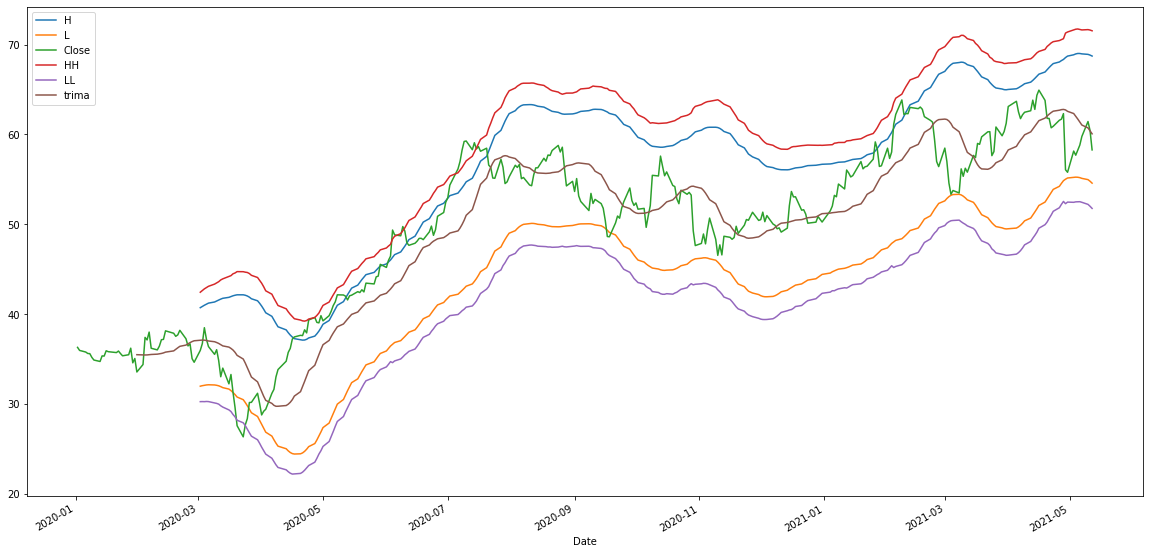

In [53]:
df[['H','L','Close','HH','LL','trima']].plot(figsize = (20,10))

In [39]:
#@title
import pandas as pd
import matplotlib.pyplot as plt

df = pdr.get_data_yahoo("NVDA", "9-1-2020")
aLength = 2
yLength = 5
zLength = 25
obLevel = 70
osLevel = 30
df['hc'] = df['Close'].rolling(aLength).max()
df['lc'] = df['Close'].rolling(aLength).min()
df['top'] = ta.ema(ta.ema((df['Close']-df['lc']), yLength),zLength)
df['bot'] = ta.ema(ta.ema((df['hc'] - df['Close']), yLength),zLength)
df['rs'] = df.apply(lambda x: x['top']/x['bot'] if x['bot']!=0 else 0, axis = 1)
df['rsi'] = df.apply(lambda x: 100 if x['bot']==0 else 0 if x['top']==0 else 100-(100/(1+x['rs'])),axis =1)
df['rsi_ema'] = ta.ema(df['rsi'], 21)


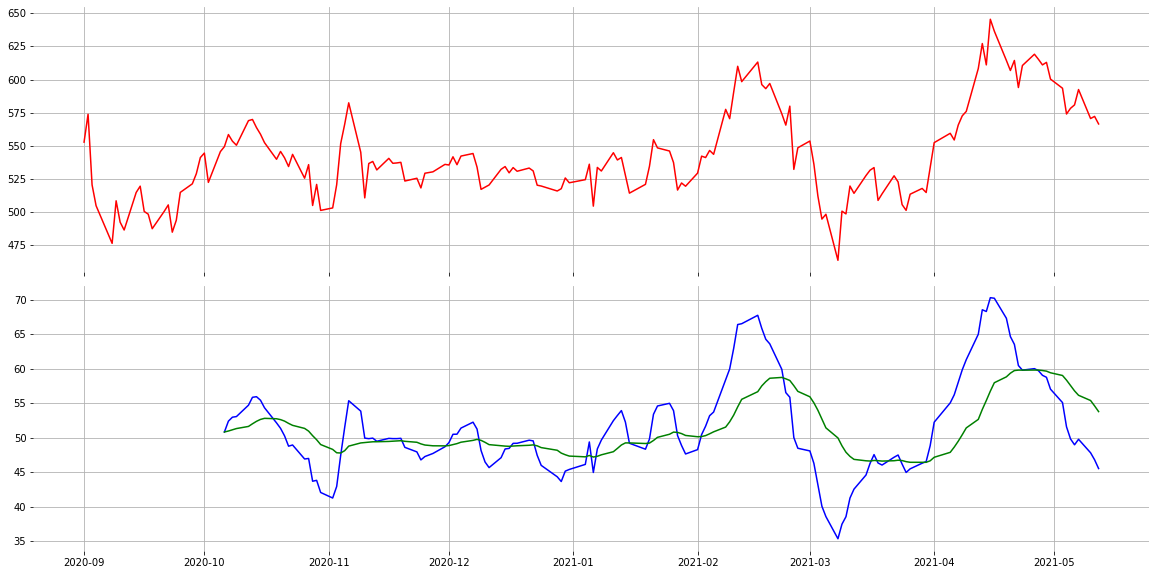

In [40]:
#@title
# df[['rsi_ema','rsi']].plot(figsize = (20,10))
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False), figsize = (20,10)) # frameon=False removes frames

plt.subplots_adjust(hspace=.05)
ax1.grid()
ax2.grid()

ax1.plot(df['Close'], color='r')
ax2.plot(df['rsi'], color = 'b')
ax2.plot(df['rsi_ema'], color = 'g')
# ax2.plot(x, y, color='b', linestyle='--')

In [4]:
#@title SHA

def SHA(df, length):
  import warnings
  warnings.filterwarnings("ignore")
  
  import matplotlib.pyplot as plt
  from bokeh.plotting import figure, output_file, show
  import bokeh
  from math import pi
  from bokeh.io import output_notebook
  from bokeh.models import Label
  from datetime import datetime as dt
  # Call once to configure Bokeh to display plots inline in the notebook.
  output_notebook()
  %matplotlib inline
  from math import pi
  from bokeh.models import Span
  w_l = length
  df['O'],df['H'],df['L'],df['C']= ta.ema(df['Open'], w_l),ta.ema(df['High'], w_l),ta.ema(df['Low'], w_l),ta.ema(df['Close'], w_l)
  df = df.dropna()
  df['C_1'] = (df['O']+df['H']+df['L']+df['O'])/4
  O,C = [df['O'][0]],[df['C'][0]]
  o,c = df['O'].shift(-1),df['C'].shift(-1)
  t= (o+c)/2
  r = t.shift(1)
  r[np.isnan(r)]=df['O'][0]
  df['O_1'] = t
  df['H_1'] = df[['H','O_1']].max(axis=1)
  df['L_1'] = df[['L','O_1']].min(axis=1)
  df['O_2'] = ta.ema(df['O_1'],w_l)
  df['L_2'] = ta.ema(df['L_1'],w_l)
  df['H_2'] = ta.ema(df['H_1'],w_l)
  df['C_2'] = ta.ema(df['C_1'],w_l)
  df['C_2'][-1] = df.C_1[-1]
  df = df.dropna()
# df = df[['O_2','H_2','L_2','C_2','Volume']]
  df = df.reset_index()
  return df[['Date','Open','High','Low','Close','O_2','H_2','L_2','C_2']]

In [342]:
#@title Consolidation
def is_consolidating(df, percentage = 2.5):
  recent_candlestick = df[-14:]
  # print(recent_candlestick)

  max_close = recent_candlestick['Close'].max()
  min_close = recent_candlestick['Close'].min()

  threshold = 1- (percentage/100)
  if min_close > (max_close*threshold):
    return True
  return False
  # print(f"The max close is {max_close} and min close is {min_close}")

def is_breaking_out(df, percentage = 2.5):
  last_close = df[-1:]['Close'].values[0]
  
  if is_consolidating(df[:-1], percentage = percentage):
    recent_closes = df[-22:-1]
    if last_close > recent_closes['Close'].max():
      return True
  return False

In [ ]:
#@title
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import pandas_ta as ta
stock = 'nvda'
df = pdr.get_data_yahoo(f'{stock}',"12-1-2020")
t = SHA(df,3)
dfs = trima(df)
m = SHA(df,5)
candlestick = go.Candlestick(x=t['Date'],open=t['O_2'],high=t['C_2'],low=t['O_2'],close=t['C_2'], name = 'Trend Filter1')
candlestick1 = go.Candlestick(x=t['Date'],open=t['Open'],high=t['High'],low=t['Low'],close=t['Close'], name = 'Candlestick')
candlestick3 = go.Candlestick(x=m['Date'],open=m['O_2'],high=m['C_2'],low=m['O_2'],close=m['C_2'], name = 'Trend Filter2')
fig = go.Figure(data=[candlestick, candlestick1, candlestick3])
cs = fig.data[1]
cs1 = fig.data[0]
cs2 = fig.data[2]

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
cs.increasing.fillcolor = '#FFFFFF';cs.increasing.line.color = '#000000';cs.decreasing.fillcolor = '#000000';cs.decreasing.line.color = '#000000'
cs.decreasing.line.width = 1;cs.increasing.line.width = 1
cs1.increasing.fillcolor = '#FF0000';cs1.increasing.line.color = '#FF0000';cs1.decreasing.fillcolor = '#0D600D';cs1.decreasing.line.color = '#0D600D'
cs1.decreasing.line.width = 1;cs1.increasing.line.width = 1
cs2.increasing.fillcolor = '#FF0000';cs2.increasing.line.color = '#FF0000';cs2.decreasing.fillcolor = '#0D600D';cs2.decreasing.line.color = '#0D600D'
cs2.decreasing.line.width = 1;cs2.increasing.line.width = 1

fig.add_traces(go.Scatter(x=dfs.index, y=dfs.HH,fill=None, mode='lines',line_color='green',line=dict(color='green',width=1),opacity=0.3, name = "Upper Resistance 1"))
fig.add_traces(go.Scatter(x=dfs.index, y=dfs.H,fill='tonexty',mode='lines', line_color='green',line=dict(color='green',width=1),opacity=0.3,name = "Upper Resistance 2"))   
fig.add_traces(go.Scatter(x=dfs.index, y=dfs.LL,fill=None, mode='lines',line_color='red',line=dict(color='red',width=1), name = "Lower Support 1"))
fig.add_traces(go.Scatter(x=dfs.index, y=dfs.L,fill='tonexty',mode='lines', line_color='red',line=dict(color='red',width=1), name = "Lower Support 2"))   

for line in b:
  fig.add_traces(go.Scatter(x = dfs.index, y = pd.Series(np.array([line for _ in range(len(dfs))])), mode = 'lines', line = dict(color = "black", width = 2),opacity=0.4, name = "VP S/R"))

fig.update_layout(title = f'{stock}', xaxis_title="Date", yaxis_title ='Price',xaxis_rangeslider_visible=False,showlegend = True, height=600)
fig.update_xaxes(showgrid=False,gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='gray')
fig.show()


In [361]:
#@title
from market_profile import MarketProfile
stock = 'DIS'
df = pdr.get_data_yahoo(f'{stock}',"12-1-2020")

class Analysis:
  
  def __init__(self, dataframe):
    self.dataframe = dataframe
    self.profile = []
    self.levels = []
    self.level = []

  # Diagram for candle stick 
  def candlestick(self):
    return self.dataframe

  # Calculation of Market Profile
  def market_profile(self):
    for i in range(1,len(self.dataframe),20):
      try:
        mp = MarketProfile(self.dataframe)
        mp_slice = mp[self.dataframe.index[0+i]: self.dataframe.index[20+i]]
        self.profile.append(mp_slice.poc_price)
      except:
        pass
    return self.profile

  def PVI(self):
    source4 = self.dataframe
    source4['pvi'] = ta.pvi(source4.Close, source4.Volume)
    source4['nvi'] = ta.nvi(source4.Close, source4.Volume)
    source4['sum_p'] = source4['pvi'] + source4['nvi']
    source4['res'] = ta.ema(source4['pvi'],9) + ta.ema(source4['nvi'],9)
    source4 = source4.bfill(axis = 'rows')
    source4['l1'] = ta.ssf(source4['res'])
    source4['l2'] = ta.ssf(source4['sum_p'])
    return source4[['Date','l1','l2']]

a = Analysis(df)


b = a.market_profile()

In [367]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from finta import TA
#Load data
df = pdr.get_data_yahoo(f'{stock}',"12-1-2020")
v = df.copy()
t = SHA(df,3)
dfs = trima(df)
m = SHA(df,5)

# Volitility 

v['macd'] = TA.MACD(v,9,19,6)['MACD']
v['signal'] = TA.MACD(v,9,19,6)['SIGNAL']
v['squeeze'] = ta.squeeze(v.High,v.Low, v.Close, 20,1.6,20,1, lazybear = True)['SQZ_ON']


# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(f'{stock}', 'Volatility'), 
               row_width=[0.1, 0.7])

# Candle stick chart
fig.add_trace(go.Candlestick(x=t['Date'],open=t['Open'],high=t['High'],low=t['Low'],close=t['Close'], 
                             name = 'Candlestick',increasing_line_color= '#000000', decreasing_line_color= '#000000',
                             decreasing_fillcolor = "#FFFFFF", increasing_fillcolor = "#000000", 
                             increasing_line_width=1,decreasing_line_width=1), row=1, col=1)

#Heikin ashi chart 1
fig.add_trace(go.Candlestick(x=t['Date'],open=t['O_2'],high=t['C_2'],low=t['O_2'],close=t['C_2'], 
                             name = 'Trend Filter1',increasing_line_color= '#FF0000', decreasing_line_color= '#0D600D',
                             decreasing_fillcolor = "#0D600D", increasing_fillcolor = "#FF0000", 
                             increasing_line_width=1,decreasing_line_width=1), row=1,col=1)

#Heikin ashi chart 2
fig.add_trace(go.Candlestick(x=m['Date'],open=m['O_2'],high=m['C_2'],low=m['O_2'],close=m['C_2'], 
                             name = 'Trend Filter2',increasing_line_color= '#FF0000', decreasing_line_color= '#0D600D',
                             decreasing_fillcolor = "#0D600D", increasing_fillcolor = "#FF0000", 
                             increasing_line_width=1,decreasing_line_width=1), row=1,col=1)

# SR Volume Profile
for line in b:
  fig.add_trace(go.Scatter(x = dfs.index, y = pd.Series(np.array([line for _ in range(len(dfs))])), mode = 'lines', line = dict(color = "black", width = 1), name = "VP S/R"))

# Upper and Lower Resistance
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.HH,fill=None, mode='lines',line_color='green',line=dict(color='green',width=1),opacity=0.3, name = "Upper Resistance 1"),row=1,col=1)
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.H,fill='tonexty',mode='lines', line_color='green',line=dict(color='green',width=1),opacity=0.3,name = "Upper Resistance 2"),row=1,col=1)   
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.LL,fill=None, mode='lines',line_color='red',line=dict(color='red',width=1), name = "Lower Support 1"),row=1,col=1)
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.L,fill='tonexty',mode='lines', line_color='red',line=dict(color='red',width=1), name = "Lower Support 2"),row=1,col=1)

# Squeeze 
fig.add_trace(go.Scatter(x=v.index, y=v.Close,mode='markers',marker_color=v['squeeze'], marker_size = 6, name = 'volatility'), row=2, col=1)


fig.update_layout(title = "Candlestick", yaxis_title ='Price',xaxis_rangeslider_visible=False,showlegend = True, height=600) #xaxis_title="Date"
fig.update_xaxes(showgrid=True,gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='gray')
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()

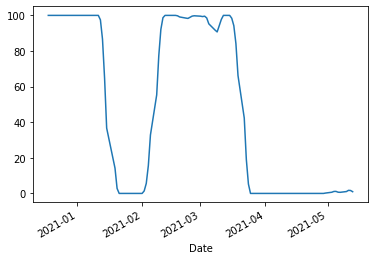

In [374]:
TA.STC(v).plot()

In [375]:
help(TA.STC)

Help on function STC in module finta.finta:

STC(ohlc: pandas.core.frame.DataFrame, period_fast: int = 23, period_slow: int = 50, k_period: int = 10, d_period: int = 3, column: str = 'close', adjust: bool = True) -> pandas.core.series.Series
    The Schaff Trend Cycle (Oscillator) can be viewed as Double Smoothed
    Stochastic of the MACD.
    
    Schaff Trend Cycle - Three input values are used with the STC:
    – Sh: shorter-term Exponential Moving Average with a default period of 23
    – Lg: longer-term Exponential Moving Average with a default period of 50
    – Cycle, set at half the cycle length with a default value of 10. (Stoch K-period)
    - Smooth, set at smoothing at 3 (Stoch D-period)
    
    The STC is calculated in the following order:
    EMA1 = EMA (Close, fast_period);
    EMA2 = EMA (Close, slow_period);
    MACD = EMA1 – EMA2.
    Second, the 10-period Stochastic from the MACD values is calculated:
    STOCH_K, STOCH_D  = StochasticFull(MACD, k_period, d_period)

In [376]:
from finta import TA
TA.VFI(df)

Date
2020-12-01   NaN
2020-12-02   NaN
2020-12-03   NaN
2020-12-04   NaN
2020-12-07   NaN
              ..
2021-05-07   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
Name: VFI, Length: 113, dtype: float64